<a href="https://colab.research.google.com/github/nilavya2000/tf_tutorial/blob/master/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [5]:
BATCH_SIZE=100
IMG_SHAPE=150

**data argumentation**

In [6]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

**horizontally flip the image**

In [7]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE)
                                               )

Found 2000 images belonging to 2 classes.


**rotating the image**

In [8]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE)
                                               )

Found 2000 images belonging to 2 classes.


**rotating the image**

In [9]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


**adding all the parameters together**

In [10]:
image_gen_train = ImageDataGenerator(rescale=1./255, rotation_range=45, 
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2, zoom_range=0.2,
                                     horizontal_flip=True, fill_mode='nearest')
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, 
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE), class_mode = 'binary'
                                                     )

Found 2000 images belonging to 2 classes.


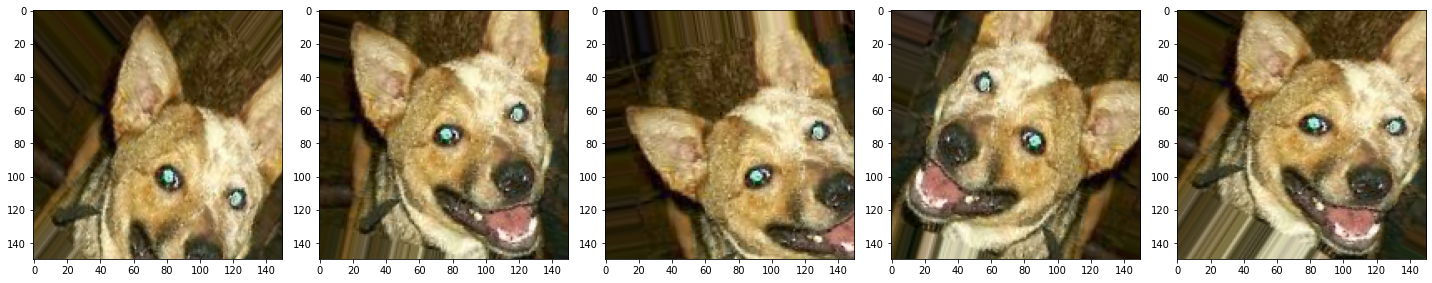

In [11]:
argument_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(argument_images)

***validation data generator***

In [19]:
image_gen_val = ImageDataGenerator(rescale = 1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE, directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary'
                                                 )

Found 1000 images belonging to 2 classes.


**define the model**

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

**compile the model**


In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

***train the model***

In [20]:
EPOCHS=100
history=model.fit_generator(train_data_gen, steps_per_epoch=int(np.ceil(total_train/ float(BATCH_SIZE))),
                            epochs=EPOCHS, validation_data=val_data_gen,
                            validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
                            )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 19s 954ms/step - loss: 0.7310 - accuracy: 0.4950 - val_loss: 0.6920 - val_accuracy: 0.5370
Epoch 2/100
20/20 [==============================] - 19s 968ms/step - loss: 0.6934 - accuracy: 0.5240 - val_loss: 0.6927 - val_accuracy: 0.5590
Epoch 3/100
20/20 [==============================] - 20s 977ms/step - loss: 0.6931 - accuracy: 0.5155 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 20s 975ms/step - loss: 0.6909 - accuracy: 0.5000 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 19s 973ms/step - loss: 0.6866 - accuracy: 0.5330 - val_loss: 0.6792 - val_accuracy: 0.5850
Epoch 6/100
20/20 [==============================] - 20s 983ms/step - loss: 0.6818 - accuracy: 0.5680 - val_loss: 0.6497 - val_accuracy: 0.6330
Epoch 7/100
20/20 [==============================] - 20s 981

***visualize the result***

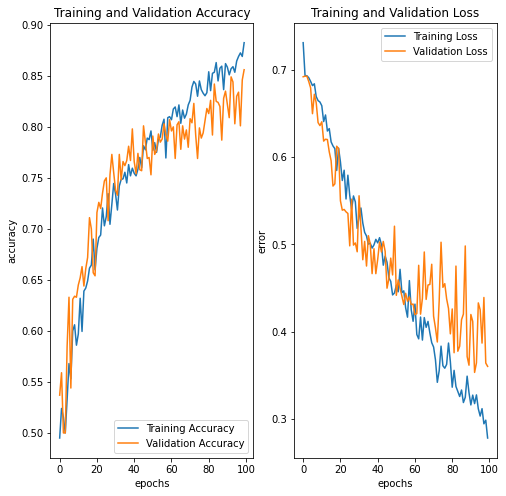

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Training and Validation Loss')
plt.show()